In [0]:
import pandas as pd
import numpy as np

# Problem 1

In [0]:
# loading data for Problem 1

# training data
url = 'https://raw.githubusercontent.com/sarahyurick/datasets/master/p1_features_training.csv'
train_features = pd.read_csv(url, header=None)
url = 'https://raw.githubusercontent.com/sarahyurick/datasets/master/p1_outcome_training.csv'
train_outcome = pd.read_csv(url, header=None)

# testing data
url = 'https://raw.githubusercontent.com/sarahyurick/datasets/master/p1_features_test.csv'
test_features = pd.read_csv(url, header=None)
url = 'https://raw.githubusercontent.com/sarahyurick/datasets/master/p1_outcome_test.csv'
test_outcome = pd.read_csv(url, header=None)

In [0]:
# building my own
# w = (XT X)-1 XT y

def find_w(XT):
  X = XT.transpose()
  # time for matrix multiplication!
  # first step: XT * X
  XT_X = np.matmul(XT, X)
  # second step: inverse!
  XT_X_inverse = np.linalg.inv(XT_X)
  # third step: inverse * XT
  XT_X_inverse_XT = np.matmul(XT_X_inverse, XT)
  # finally: multiply by y
  w = np.matmul(XT_X_inverse_XT, train_outcome.values)
  return w

## 1.1  Part a

In [7]:
# 1.1 Part a

# adding 60 ones to train_features
b = np.ones(60)
temp1 = np.append(b, train_features.iloc[:,0].values)
# creating XT and X
XT = np.matrix(temp1.reshape(2, 60))
w = find_w(XT)

print("Parameters from self-built model: ", w)

Parameters from self-built model:  [[ 0.40674459]
 [-2.78085966]]


In [8]:
# checking against pre-built model
from statsmodels.regression.linear_model import OLS

ols = OLS(train_outcome.values, train_features.iloc[:,0].values).fit()
print("Parameters from built-in model: ", ols.params)

Parameters from built-in model:  [-2.75507793]


In [0]:
def calculate_SStot(y_true):
  sum_y = 0
  for y in y_true[0]:
    sum_y = sum_y + y
  y_mean = sum_y / len(y_true[0])
  SStot = 0
  for yi in y_true[0]:
    sub = yi - y_mean
    squared = sub * sub
    SStot = SStot + squared
  return SStot

def calculate_SSres(x_lists, y_true, beta0, betalist):
  y_pred = get_ypred(x_lists, beta0, betalist)
  num_rows = x_lists.shape[0]
  SSres = 0
  for i in range(num_rows):
    sub = y_true.iloc[i,0] - y_pred[i]
    squared = sub * sub
    SSres = SSres + squared
  return SSres

def get_ypred(x_lists, beta0, betalist):
  y_pred = []
  num_rows = x_lists.shape[0]
  num_cols = x_lists.shape[1]
  for row in range(num_rows):
    f = beta0
    for i in range(len(betalist)):
      f = f + (betalist[i] * x_lists.iloc[row,i])
    y_pred.append(f)
  return y_pred

def calculate_R2(SSres,SStot):
  return 1 - (SSres/SStot)

In [10]:
beta0 = 0.40674459
beta1 = [-2.78085966]

train_R2 = calculate_R2(calculate_SSres(train_features, train_outcome, beta0, beta1),
                        calculate_SStot(train_outcome))

print("R2 on training data: ", train_R2)

test_R2 = calculate_R2(calculate_SSres(test_features, test_outcome, beta0, beta1),
                        calculate_SStot(test_outcome))
print("R2 on test data: ", test_R2)

R2 on training data:  0.26463224712065936
R2 on test data:  0.19791420964218887


In [11]:
# checking against pre-built model
from sklearn.metrics import r2_score

other_train_R2 = r2_score(train_outcome[0], get_ypred(train_features, beta0, beta1))
print("R2 on training data from built-in model: ", other_train_R2)

other_test_R2 = r2_score(test_outcome[0], get_ypred(test_features, beta0, beta1))
print("R2 from test data from built-in model: ", other_test_R2)

R2 on training data from built-in model:  0.2646322471206596
R2 from test data from built-in model:  0.19791420964218864


## 1.2  Part b

### Parameters for Models 2-10
Note that each of the outputted matrices are of the form:

[ [beta0]
[beta1]
[beta2]
... [beta_n] ]

In [12]:
# 1.2 Part b

temp2 = np.append(temp1, train_features.iloc[:,1].values)
# creating XT
XT = np.matrix(temp2.reshape(3, 60))
w_2 = find_w(XT)
print("Parameters from self-built model with X1 and X2: ", w_2)

temp3 = np.append(temp2, train_features.iloc[:,2].values)
# creating XT
XT = np.matrix(temp3.reshape(4, 60))
w_3 = find_w(XT)
print("Parameters from self-built model with X1 through X3: ", w_3)

temp4 = np.append(temp3, train_features.iloc[:,3].values)
# creating XT
XT = np.matrix(temp4.reshape(5, 60))
w_4 = find_w(XT)
print("Parameters from self-built model with X1 through X4: ", w_4)

temp5 = np.append(temp4, train_features.iloc[:,4].values)
# creating XT
XT = np.matrix(temp5.reshape(6, 60))
w_5 = find_w(XT)
print("Parameters from self-built model with X1 through X5: ", w_5)

temp6 = np.append(temp5, train_features.iloc[:,5].values)
# creating XT
XT = np.matrix(temp6.reshape(7, 60))
w_6 = find_w(XT)
print("Parameters from self-built model with X1 through X6: ", w_6)

temp7 = np.append(temp6, train_features.iloc[:,6].values)
# creating XT
XT = np.matrix(temp7.reshape(8, 60))
w_7 = find_w(XT)
print("Parameters from self-built model with X1 through X7: ", w_7)

temp8 = np.append(temp7, train_features.iloc[:,7].values)
# creating XT
XT = np.matrix(temp8.reshape(9, 60))
w_8 = find_w(XT)
print("Parameters from self-built model with X1 through X8: ", w_8)

temp9 = np.append(temp8, train_features.iloc[:,8].values)
# creating XT
XT = np.matrix(temp9.reshape(10, 60))
w_9 = find_w(XT)
print("Parameters from self-built model with X1 through X9: ", w_9)

temp10 = np.append(temp9, train_features.iloc[:,9].values)
# creating XT
XT = np.matrix(temp10.reshape(11, 60))
w_10 = find_w(XT)
print("Parameters from self-built model with X1 through X10: ", w_10)

Parameters from self-built model with X1 and X2:  [[ 0.67409226]
 [-2.90929752]
 [ 1.90005768]]
Parameters from self-built model with X1 through X3:  [[ 0.70482473]
 [-3.08275246]
 [ 2.09191055]
 [ 0.63121207]]
Parameters from self-built model with X1 through X4:  [[ 0.75565022]
 [-3.16890966]
 [ 2.12431768]
 [ 0.63363396]
 [ 0.44252935]]
Parameters from self-built model with X1 through X5:  [[ 0.76902335]
 [-3.23035793]
 [ 2.13281565]
 [ 0.65575147]
 [ 0.50865801]
 [ 0.38895509]]
Parameters from self-built model with X1 through X6:  [[ 0.74597356]
 [-3.03698046]
 [ 2.31590639]
 [ 0.76741641]
 [ 0.50888305]
 [ 0.15620363]
 [ 1.23050753]]
Parameters from self-built model with X1 through X7:  [[ 0.84020451]
 [-2.96919315]
 [ 2.27411421]
 [ 0.66735457]
 [ 0.67451167]
 [ 0.03699883]
 [ 1.43154227]
 [ 0.97311978]]
Parameters from self-built model with X1 through X8:  [[ 0.84057079]
 [-2.96874344]
 [ 2.27311662]
 [ 0.66732453]
 [ 0.6732113 ]
 [ 0.0370935 ]
 [ 1.43086199]
 [ 0.97319253]
 [ 0.

### R2 for Model 2

In [13]:
w_2 = np.array(w_2)
w_2 = w_2.ravel()
beta0 = w_2[0]
w_2 = np.delete(w_2, 0)

train_R2_2 = calculate_R2(calculate_SSres(train_features, train_outcome, beta0, w_2),
                        calculate_SStot(train_outcome))

print("R2 on training data: ", train_R2_2)

test_R2_2 = calculate_R2(calculate_SSres(test_features, test_outcome, beta0, w_2),
                        calculate_SStot(test_outcome))
print("R2 on test data: ", test_R2_2)

R2 on training data:  0.3607204743217294
R2 on test data:  0.20002186542002198


### R2 for Model 3

In [14]:
w_3 = np.array(w_3)
w_3 = w_3.ravel()
beta0 = w_3[0]
w_3 = np.delete(w_3, 0)

train_R2_3 = calculate_R2(calculate_SSres(train_features, train_outcome, beta0, w_3),
                        calculate_SStot(train_outcome))

print("R2 on training data: ", train_R2_3)

test_R2_3 = calculate_R2(calculate_SSres(test_features, test_outcome, beta0, w_3),
                        calculate_SStot(test_outcome))
print("R2 on test data: ", test_R2_3)

R2 on training data:  0.37095433405813694
R2 on test data:  0.23029883952513353


### R2 for Model 4

In [15]:
w_4 = np.array(w_4)
w_4 = w_4.ravel()
beta0 = w_4[0]
w_4 = np.delete(w_4, 0)

train_R2_4 = calculate_R2(calculate_SSres(train_features, train_outcome, beta0, w_4),
                        calculate_SStot(train_outcome))

print("R2 on training data: ", train_R2_4)

test_R2_4 = calculate_R2(calculate_SSres(test_features, test_outcome, beta0, w_4),
                        calculate_SStot(test_outcome))
print("R2 on test data: ", test_R2_4)

R2 on training data:  0.37448925882531137
R2 on test data:  0.23970105028559563


### R2 for Model 5

In [16]:
w_5 = np.array(w_5)
w_5 = w_5.ravel()
beta0 = w_5[0]
w_5 = np.delete(w_5, 0)

train_R2_5 = calculate_R2(calculate_SSres(train_features, train_outcome, beta0, w_5),
                        calculate_SStot(train_outcome))

print("R2 on training data: ", train_R2_5)

test_R2_5 = calculate_R2(calculate_SSres(test_features, test_outcome, beta0, w_5),
                        calculate_SStot(test_outcome))
print("R2 on test data: ", test_R2_5)

R2 on training data:  0.37719386907911523
R2 on test data:  0.2404105456343777


### R2 for Model 6

In [17]:
w_6 = np.array(w_6)
w_6 = w_6.ravel()
beta0 = w_6[0]
w_6 = np.delete(w_6, 0)

train_R2_6 = calculate_R2(calculate_SSres(train_features, train_outcome, beta0, w_6),
                        calculate_SStot(train_outcome))

print("R2 on training data: ", train_R2_6)

test_R2_6 = calculate_R2(calculate_SSres(test_features, test_outcome, beta0, w_6),
                        calculate_SStot(test_outcome))
print("R2 on test data: ", test_R2_6)

R2 on training data:  0.4042012465172713
R2 on test data:  0.14926100998102954


### R2 for Model 7

In [18]:
w_7 = np.array(w_7)
w_7 = w_7.ravel()
beta0 = w_7[0]
w_7 = np.delete(w_7, 0)

train_R2_7 = calculate_R2(calculate_SSres(train_features, train_outcome, beta0, w_7),
                        calculate_SStot(train_outcome))

print("R2 on training data: ", train_R2_7)

test_R2_7 = calculate_R2(calculate_SSres(test_features, test_outcome, beta0, w_7),
                        calculate_SStot(test_outcome))
print("R2 on test data: ", test_R2_7)

R2 on training data:  0.4214797282295738
R2 on test data:  0.10178940259254188


### R2 for Model 8

In [19]:
w_8 = np.array(w_8)
w_8 = w_8.ravel()
beta0 = w_8[0]
w_8 = np.delete(w_8, 0)

train_R2_8 = calculate_R2(calculate_SSres(train_features, train_outcome, beta0, w_8),
                        calculate_SStot(train_outcome))

print("R2 on training data: ", train_R2_8)

test_R2_8 = calculate_R2(calculate_SSres(test_features, test_outcome, beta0, w_8),
                        calculate_SStot(test_outcome))
print("R2 on test data: ", test_R2_8)

R2 on training data:  0.42148031895726146
R2 on test data:  0.10186902292761912


### R2 for Model 9

In [20]:
w_9 = np.array(w_9)
w_9 = w_9.ravel()
beta0 = w_9[0]
w_9 = np.delete(w_9, 0)

train_R2_9 = calculate_R2(calculate_SSres(train_features, train_outcome, beta0, w_9),
                        calculate_SStot(train_outcome))

print("R2 on training data: ", train_R2_9)

test_R2_9 = calculate_R2(calculate_SSres(test_features, test_outcome, beta0, w_9),
                        calculate_SStot(test_outcome))
print("R2 on test data: ", test_R2_9)

R2 on training data:  0.4218435778202655
R2 on test data:  0.09907389183141424


### R2 for Model 10

In [21]:
w_10 = np.array(w_10)
w_10 = w_10.ravel()
beta0 = w_10[0]
w_10 = np.delete(w_10, 0)

train_R2_10 = calculate_R2(calculate_SSres(train_features, train_outcome, beta0, w_10),
                        calculate_SStot(train_outcome))

print("R2 on training data: ", train_R2_10)

test_R2_10 = calculate_R2(calculate_SSres(test_features, test_outcome, beta0, w_10),
                        calculate_SStot(test_outcome))
print("R2 on test data: ", test_R2_10)

R2 on training data:  0.4335360231974493
R2 on test data:  0.060224442032695835


## Visualizations

In [0]:
train_R2_list = [train_R2, train_R2_2, train_R2_3, train_R2_4, train_R2_5, 
           train_R2_6, train_R2_7, train_R2_8, train_R2_9, train_R2_10]
test_R2_list = [test_R2, test_R2_2, test_R2_3, test_R2_4, test_R2_5, 
           test_R2_6, test_R2_7, test_R2_8, test_R2_9, test_R2_10]
num_features = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

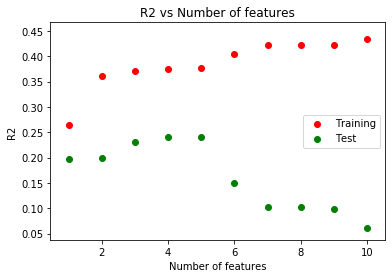

In [23]:
import matplotlib.pyplot as plt

fig = plt.figure()

ax = fig.add_subplot(1, 1, 1)
ax.scatter(num_features, train_R2_list, c="red", label="Training")
ax.scatter(num_features, test_R2_list, c="green", label="Test")

plt.title("R2 vs Number of features")
plt.legend(loc='center right')
plt.xlabel('Number of features')
plt.ylabel('R2')
plt.show()

# Problem 2

In [0]:
# loading data for Problem 2

url = 'https://raw.githubusercontent.com/sarahyurick/datasets/master/p2_congress_1984_votes.csv'
votes = pd.read_csv(url, header=None)
url = 'https://raw.githubusercontent.com/sarahyurick/datasets/master/p2_congress_1984_party_affiliations.csv'
affiliations = pd.read_csv(url, header=None)

## 2.1  Part a

I used this source to help me with 2.1  Part a: https://plot.ly/python/v3/ipython-notebooks/principal-component-analysis/

In [25]:
# standardizing
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(votes)

# getting the covariance matrix
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
# equivalently: 
# cov_mat = np.cov(X_std.T)

# eigendecomposition
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print("Eigenvectors: ", eig_vecs)
print("Eigenvalues: ", eig_vals)

Eigenvectors:  [[-1.87809330e-01 -1.81722119e-01 -1.55275769e-01  5.53363824e-01
   3.95918006e-01  4.94792150e-01 -6.20394464e-02  1.06978258e-02
  -5.85601301e-02  1.72339485e-01  5.45292676e-02  1.61018808e-01
   1.17913902e-01 -3.23472153e-01 -1.21564992e-01  2.24123205e-02]
 [ 5.38655080e-02 -6.10752223e-01  1.37255837e-01  4.08772744e-01
  -1.11659131e-01 -5.32813707e-01 -3.65539275e-04  1.00665084e-01
   9.38662181e-02  7.18097848e-02 -1.10895527e-01  7.01216422e-02
  -1.22742773e-01 -7.37275759e-03  4.54129677e-02  2.88598767e-01]
 [-2.93251619e-01 -8.58088375e-02  1.83349755e-01  2.74308742e-02
   3.39469693e-02  2.87636785e-02 -1.84410234e-01  1.37147698e-01
  -1.66809452e-01 -2.70406816e-01 -6.13057352e-01 -4.33207839e-01
   3.69655169e-01  3.77171990e-02 -1.00605249e-01 -6.95114324e-02]
 [ 3.10693742e-01  1.35055455e-01 -1.01923087e-01  1.02105209e-01
  -4.98940153e-02 -6.73630916e-02 -2.87738053e-01 -4.43949692e-02
  -7.87331778e-01  1.70004967e-01 -4.98713505e-02 -1.63736

In [0]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()

In [27]:
# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
7.419419265767017
1.430469578054541
1.1336017512812828
0.8649393941356077
0.8042164219999025
0.7527016395846976
0.5762768779587418
0.5265406975312228
0.4729970327282355
0.43394765430842475
0.39372229464673253
0.3317983144254019
0.30600180596604054
0.2409306571627915
0.21590378737450872
0.13339918652185503


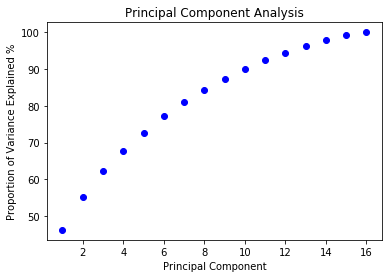

In [28]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

num_components = [(i+1) for i in range(16)]

fig = plt.figure()

ax = fig.add_subplot(1, 1, 1)
ax.scatter(num_components, cum_var_exp, c="blue",
           label="Proportion of Variance Explained %")

plt.title("Principal Component Analysis")
plt.ylabel("Proportion of Variance Explained %")
plt.xlabel("Principal Component")
plt.show()

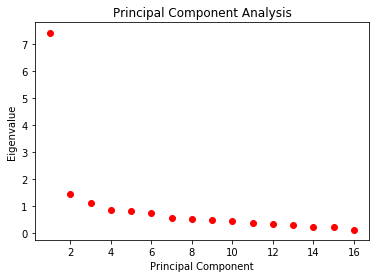

In [29]:
num_components = [(i+1) for i in range(16)]

fig = plt.figure()

ax = fig.add_subplot(1, 1, 1)
ax.scatter(num_components, sorted(eig_vals, reverse=True), c="red",
           label="Eigenvalue")

plt.title("Principal Component Analysis")
plt.ylabel("Eigenvalue")
plt.xlabel("Principal Component")
plt.show()

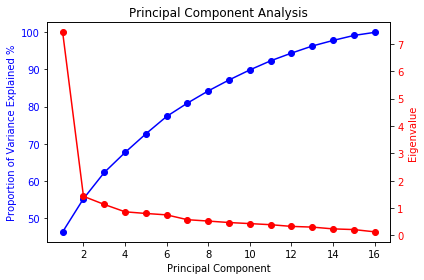

In [30]:
fig, ax1 = plt.subplots()

color = 'blue'
ax1.set_xlabel('Principal Component')
ax1.set_ylabel('Proportion of Variance Explained %', color=color)
ax1.plot(num_components, cum_var_exp, color=color, marker='o')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'red'
ax2.set_ylabel('Eigenvalue', color=color)  # we already handled the x-label with ax1
ax2.plot(num_components, sorted(eig_vals, reverse=True), color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)

plt.title("Principal Component Analysis")
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

### PC1-PC2

In [31]:
# reducing the 16-dimensional feature space
# to a 2-dimensional feature subspace
# by choosing the top 3 eigenvectors
matrix_w = np.hstack((eig_pairs[0][1].reshape(16,1), 
                      eig_pairs[1][1].reshape(16,1)))

print('Matrix W:', matrix_w)

Matrix W: [[-0.18780933 -0.18172212]
 [ 0.05386551 -0.61075222]
 [-0.29325162 -0.08580884]
 [ 0.31069374  0.13505545]
 [ 0.32982429 -0.03476445]
 [ 0.26111754 -0.08521068]
 [-0.29052391  0.18229466]
 [-0.32161235  0.04488362]
 [-0.30007697  0.14629295]
 [ 0.01129995  0.38175157]
 [-0.06852963 -0.50627296]
 [ 0.28732779  0.15733647]
 [ 0.27557143 -0.08472336]
 [ 0.28569924  0.14338653]
 [-0.24614685 -0.02048274]
 [-0.13753029  0.21972732]]


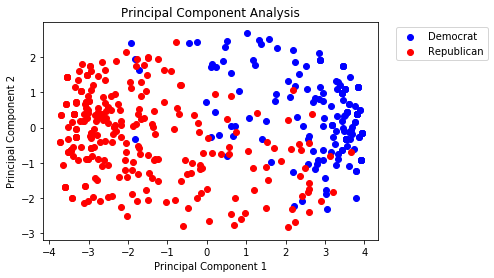

In [32]:
# projection onto the new feature subspace
Y = X_std.dot(matrix_w)

x_blue = []
x_blue.append(Y[affiliations.iloc[:,0].values=='Democrat',0])
y_blue = []
y_blue.append(Y[affiliations.iloc[:,0].values=='Democrat',1])

x_red = []
x_red.append(Y[affiliations.iloc[:,0].values=='Republican',0])
y_red = []
y_red.append(Y[affiliations.iloc[:,0].values=='Republican',1])

plt.scatter(x_blue, y_blue, color='blue', label='Democrat')
plt.scatter(x_red, y_red, color='red', label='Republican')

plt.title("Principal Component Analysis")
plt.ylabel("Principal Component 2")
plt.xlabel("Principal Component 1")
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.show()

### PC1-PC3

In [33]:
# reducing the 16-dimensional feature space
# to a 2-dimensional feature subspace
# by choosing the top 3 eigenvectors
matrix_w = np.hstack((eig_pairs[0][1].reshape(16,1), 
                      eig_pairs[2][1].reshape(16,1)))

print('Matrix W:', matrix_w)

Matrix W: [[-0.18780933 -0.15527577]
 [ 0.05386551  0.13725584]
 [-0.29325162  0.18334976]
 [ 0.31069374 -0.10192309]
 [ 0.32982429  0.01447065]
 [ 0.26111754  0.31285733]
 [-0.29052391  0.01316406]
 [-0.32161235  0.06646765]
 [-0.30007697 -0.00834646]
 [ 0.01129995  0.63236536]
 [-0.06852963  0.44793651]
 [ 0.28732779 -0.04989752]
 [ 0.27557143  0.11856934]
 [ 0.28569924  0.13103759]
 [-0.24614685 -0.04185746]
 [-0.13753029  0.41748102]]


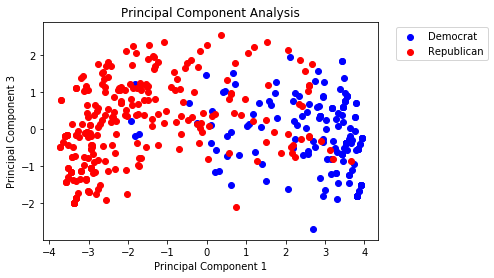

In [34]:
# projection onto the new feature subspace
Y = X_std.dot(matrix_w)

x_blue = []
x_blue.append(Y[affiliations.iloc[:,0].values=='Democrat',0])
y_blue = []
y_blue.append(Y[affiliations.iloc[:,0].values=='Democrat',1])

x_red = []
x_red.append(Y[affiliations.iloc[:,0].values=='Republican',0])
y_red = []
y_red.append(Y[affiliations.iloc[:,0].values=='Republican',1])

plt.scatter(x_blue, y_blue, color='blue', label='Democrat')
plt.scatter(x_red, y_red, color='red', label='Republican')

plt.title("Principal Component Analysis")
plt.ylabel("Principal Component 3")
plt.xlabel("Principal Component 1")
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.show()

### PC2-PC3

In [35]:
# reducing the 16-dimensional feature space
# to a 2-dimensional feature subspace
# by choosing the top 3 eigenvectors
matrix_w = np.hstack((eig_pairs[1][1].reshape(16,1), 
                      eig_pairs[2][1].reshape(16,1)))

print('Matrix W:', matrix_w)

Matrix W: [[-0.18172212 -0.15527577]
 [-0.61075222  0.13725584]
 [-0.08580884  0.18334976]
 [ 0.13505545 -0.10192309]
 [-0.03476445  0.01447065]
 [-0.08521068  0.31285733]
 [ 0.18229466  0.01316406]
 [ 0.04488362  0.06646765]
 [ 0.14629295 -0.00834646]
 [ 0.38175157  0.63236536]
 [-0.50627296  0.44793651]
 [ 0.15733647 -0.04989752]
 [-0.08472336  0.11856934]
 [ 0.14338653  0.13103759]
 [-0.02048274 -0.04185746]
 [ 0.21972732  0.41748102]]


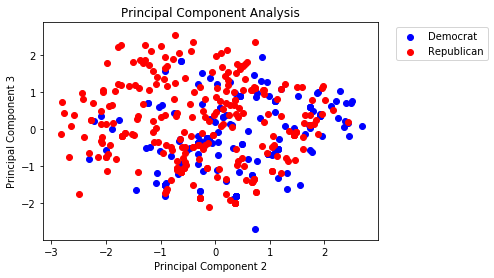

In [36]:
# projection onto the new feature subspace
Y = X_std.dot(matrix_w)

x_blue = []
x_blue.append(Y[affiliations.iloc[:,0].values=='Democrat',0])
y_blue = []
y_blue.append(Y[affiliations.iloc[:,0].values=='Democrat',1])

x_red = []
x_red.append(Y[affiliations.iloc[:,0].values=='Republican',0])
y_red = []
y_red.append(Y[affiliations.iloc[:,0].values=='Republican',1])

plt.scatter(x_blue, y_blue, color='blue', label='Democrat')
plt.scatter(x_red, y_red, color='red', label='Republican')

plt.title("Principal Component Analysis")
plt.ylabel("Principal Component 3")
plt.xlabel("Principal Component 2")
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.show()

## 2.2  Part b

I used this source to help me with 2.2  Part b: http://benalexkeen.com/k-means-clustering-in-python/

In [0]:
# k-means from scratch!

# choosing 2 random data points to be the initial centroids
np.random.seed(200)
k = 2
centroids = {
    i+1: [np.random.randint(-1, 2) for j in range(16)]
    for i in range(k)
}

In [38]:
# assign each data point to the closest centroid
def assignment(votes, centroids):
    for i in centroids.keys():
        votes['distance_from_{}'.format(i)] = (
            np.sqrt(
                (votes[0] - centroids[i][0]) ** 2
                + (votes[1] - centroids[i][1]) ** 2
                + (votes[2] - centroids[i][2]) ** 2
                + (votes[3] - centroids[i][3]) ** 2
                + (votes[4] - centroids[i][4]) ** 2
                + (votes[5] - centroids[i][5]) ** 2
                + (votes[6] - centroids[i][6]) ** 2
                + (votes[7] - centroids[i][7]) ** 2
                + (votes[8] - centroids[i][8]) ** 2
                + (votes[9] - centroids[i][9]) ** 2
                + (votes[10] - centroids[i][10]) ** 2
                + (votes[11] - centroids[i][11]) ** 2
                + (votes[12] - centroids[i][12]) ** 2
                + (votes[13] - centroids[i][13]) ** 2
                + (votes[14] - centroids[i][14]) ** 2
                + (votes[15] - centroids[i][15]) ** 2
            )
        )
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    votes['closest'] = votes.loc[:, centroid_distance_cols].idxmin(axis=1)
    votes['closest'] = votes['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    return votes

votes = assignment(votes, centroids)
votes

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,distance_from_1,distance_from_2,closest
0,-1,1,-1,1,1,1,-1,-1,-1,1,0,1,1,1,-1,1,5.291503,5.477226,1
1,-1,1,-1,1,1,1,-1,-1,-1,-1,-1,1,1,1,-1,0,5.477226,4.690416,2
2,0,1,1,0,1,1,-1,-1,-1,-1,1,-1,1,1,-1,-1,5.385165,4.795832,2
3,-1,1,1,-1,0,1,-1,-1,-1,-1,1,-1,1,-1,-1,1,5.656854,5.830952,1
4,1,1,1,-1,1,1,-1,-1,-1,-1,1,0,1,1,1,1,4.898979,5.477226,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,-1,-1,1,1,1,1,-1,-1,1,1,-1,1,1,1,-1,1,5.916080,5.385165,2
431,-1,-1,1,-1,-1,-1,1,1,1,1,-1,-1,-1,-1,-1,1,5.196152,5.744563,1
432,-1,0,-1,1,1,1,-1,-1,-1,-1,1,1,1,1,-1,1,5.099020,5.291503,1
433,-1,-1,-1,1,1,1,0,0,0,0,-1,1,1,1,-1,1,5.000000,4.582576,2


In [0]:
# re-compute the centroids using the current cluster memberships
import copy

old_centroids = copy.deepcopy(centroids)

def update(k):
    for i in centroids.keys():
        centroids[i][0] = np.mean(votes[votes['closest'] == i][0])
        centroids[i][1] = np.mean(votes[votes['closest'] == i][1])
        centroids[i][2] = np.mean(votes[votes['closest'] == i][2])
        centroids[i][3] = np.mean(votes[votes['closest'] == i][3])
        centroids[i][4] = np.mean(votes[votes['closest'] == i][4])
        centroids[i][5] = np.mean(votes[votes['closest'] == i][5])
        centroids[i][6] = np.mean(votes[votes['closest'] == i][6])
        centroids[i][7] = np.mean(votes[votes['closest'] == i][7])
        centroids[i][8] = np.mean(votes[votes['closest'] == i][8])
        centroids[i][9] = np.mean(votes[votes['closest'] == i][9])
        centroids[i][10] = np.mean(votes[votes['closest'] == i][10])
        centroids[i][11] = np.mean(votes[votes['closest'] == i][11])
        centroids[i][12] = np.mean(votes[votes['closest'] == i][12])
        centroids[i][13] = np.mean(votes[votes['closest'] == i][13])
        centroids[i][14] = np.mean(votes[votes['closest'] == i][14])
        centroids[i][15] = np.mean(votes[votes['closest'] == i][15])
    return k

centroids = update(centroids)


# repeat assignment stage
votes = assignment(votes, centroids)

# continue until all assigned categories don't change anymore
while True:
    closest_centroids = votes['closest'].copy(deep=True)
    centroids = update(centroids)
    votes = assignment(votes, centroids)
    if closest_centroids.equals(votes['closest']):
        break

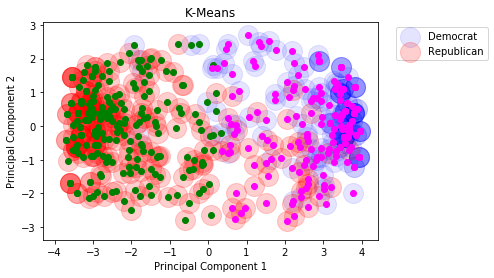

In [40]:
# reducing the 16-dimensional feature space
# to a 2-dimensional feature subspace
# by choosing the top 3 eigenvectors
matrix_w = np.hstack((eig_pairs[0][1].reshape(16,1), 
                      eig_pairs[1][1].reshape(16,1)))

# projection onto the new feature subspace
Y = X_std.dot(matrix_w)

x_blue = []
x_blue.append(Y[affiliations.iloc[:,0].values=='Democrat',0])
y_blue = []
y_blue.append(Y[affiliations.iloc[:,0].values=='Democrat',1])

x_red = []
x_red.append(Y[affiliations.iloc[:,0].values=='Republican',0])
y_red = []
y_red.append(Y[affiliations.iloc[:,0].values=='Republican',1])

x_green = []
# Y[affiliations.iloc[:,0].values=='Democrat',0
x_green.append(Y[votes['closest']==1,0])
y_green = []
y_green.append(Y[votes['closest']==1,1])

x_purple = []
x_purple.append(Y[votes['closest']==2,0])
y_purple = []
y_purple.append(Y[votes['closest']==2,1])

plt.scatter(x_blue, y_blue, color='blue', label='Democrat', alpha=0.10, s=400)
plt.scatter(x_red, y_red, color='red', label='Republican', alpha=0.19, s=400)
plt.scatter(x_green, y_green, color='green')
plt.scatter(x_purple, y_purple, color='magenta')

plt.title("K-Means")
plt.ylabel("Principal Component 2")
plt.xlabel("Principal Component 1")
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.show()

In [41]:
type(x_red)

list

In [42]:
# quantifying the agreement of the clusters with the party affiliations

# accuracy = number of test samples with label correctly predicted
#            / number of test samples
def intersection(lst1, lst2): 
    lst3 = [value for value in lst1 if value in lst2] 
    return lst3
# (crosses fingers) these better be the same
x_red_green_overlap = intersection(x_red[0], x_green[0])
y_red_green_overlap = intersection(y_red[0], y_green[0])
# they are!
# PLEASE be the same
x_blue_purple_overlap = intersection(x_blue[0], x_purple[0])
y_blue_purple_overlap = intersection(y_blue[0], y_purple[0])
# YES

accuracy = (len(x_red_green_overlap) + len(x_blue_purple_overlap)) / 435
print("Accuracy: ", accuracy)

Accuracy:  0.8781609195402299


In [100]:
# k-means again

# choosing 2 random data points to be the initial centroids
np.random.seed(200)
k = 2
centroids = [[np.random.randint(-1, 2), np.random.randint(-1, 2)], [np.random.randint(-1, 2), np.random.randint(-1, 2)]]
centroids[0][0]

1

### Attempting to re-calculate the projections

In [0]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(16,1), 
                      eig_pairs[1][1].reshape(16,1)))
url = 'https://raw.githubusercontent.com/sarahyurick/datasets/master/p2_congress_1984_votes.csv'
votes = pd.read_csv(url, header=None)
votes = votes.values
# votes = np.hstack(votes.values.reshape(16, 435))
projections = np.matmul(votes, matrix_w)

In [110]:
x_proj = []
for i in range(len(projections)):
  x = projections[i][0]
  x_proj.append(x)

y_proj = []
for i in range(len(projections)):
  y = projections[i][1]
  y_proj.append(y)

projections

array([[ 3.31729023,  0.1363491 ],
       [ 3.50075026, -0.34060841],
       [ 1.8415594 , -2.37594984],
       [ 0.54239164, -2.14183715],
       [ 0.86302984, -2.13690178],
       [ 1.08837998, -0.91824809],
       [ 2.02069927, -0.39179614],
       [ 2.54241755, -0.45603676],
       [ 3.36321997, -0.12088109],
       [-3.03241302, -0.61137052],
       [ 2.76018804, -1.05352379],
       [ 2.83021636, -1.53097354],
       [-2.1056515 , -0.417373  ],
       [-2.2833794 , -1.04027389],
       [ 2.93947959, -0.39927158],
       [ 3.23765092,  0.27950821],
       [-0.89239997,  0.14994714],
       [-2.91881281,  0.02917956],
       [ 3.35095276, -0.7176722 ],
       [-3.55314943, -1.42467187],
       [-2.69187794, -1.80246845],
       [-2.85481949, -0.35346277],
       [-3.18262788,  0.35596275],
       [-3.41609016, -0.41212594],
       [-3.38629089,  0.58965118],
       [-3.50122128,  1.57288165],
       [-3.66088045, -0.20316742],
       [-3.55314943, -1.42467187],
       [ 0.53320874,

In [109]:
# assign each data point to the closest centroid
def easier_assignment(xs, ys, centroids):
    for i in range(len(centroids)):
        votes['distance_from_{}'.format(i)] = (
            np.sqrt(
                (xs[i] - centroids[i][0]) ** 2
                + (ys[i] - centroids[i][1]) ** 2)
        )
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    votes['closest'] = votes.loc[:, centroid_distance_cols].idxmin(axis=1)
    votes['closest'] = votes['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    return votes

#url = 'https://raw.githubusercontent.com/sarahyurick/datasets/master/p2_congress_1984_votes.csv'
#votes = pd.read_csv(url, header=None)
votes = easier_assignment(x_proj, y_proj, centroids)

IndexError: ignored

In [0]:
# re-compute the centroids using the current cluster memberships
import copy

old_centroids = copy.deepcopy(centroids)

def easier_update(k):
    for i in centroids.keys():
        centroids[i][0] = np.mean(votes[votes['closest'] == i][0])
        centroids[i][1] = np.mean(votes[votes['closest'] == i][1])
    return k

centroids = easier_update(centroids)


# repeat assignment stage
votes = easier_assignment(votes, centroids)

# continue until all assigned categories don't change anymore
while True:
    closest_centroids = votes['closest'].copy(deep=True)
    centroids = easier_update(centroids)
    votes = easier_assignment(votes, centroids)
    if closest_centroids.equals(votes['closest']):
        break

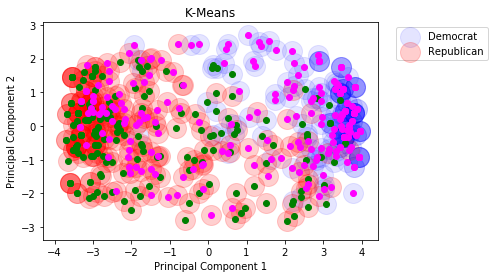

In [46]:
# reducing the 16-dimensional feature space
# to a 2-dimensional feature subspace
# by choosing the top 3 eigenvectors
matrix_w = np.hstack((eig_pairs[0][1].reshape(16,1), 
                      eig_pairs[1][1].reshape(16,1)))

# projection onto the new feature subspace
Y = X_std.dot(matrix_w)

x_blue = []
x_blue.append(Y[affiliations.iloc[:,0].values=='Democrat',0])
y_blue = []
y_blue.append(Y[affiliations.iloc[:,0].values=='Democrat',1])

x_red = []
x_red.append(Y[affiliations.iloc[:,0].values=='Republican',0])
y_red = []
y_red.append(Y[affiliations.iloc[:,0].values=='Republican',1])

x_green = []
# Y[affiliations.iloc[:,0].values=='Democrat',0
x_green.append(Y[votes['closest']==1,0])
y_green = []
y_green.append(Y[votes['closest']==1,1])

x_purple = []
x_purple.append(Y[votes['closest']==2,0])
y_purple = []
y_purple.append(Y[votes['closest']==2,1])

plt.scatter(x_blue, y_blue, color='blue', label='Democrat', alpha=0.10, s=400)
plt.scatter(x_red, y_red, color='red', label='Republican', alpha=0.19, s=400)
plt.scatter(x_green, y_green, color='green')
plt.scatter(x_purple, y_purple, color='magenta')

plt.title("K-Means")
plt.ylabel("Principal Component 2")
plt.xlabel("Principal Component 1")
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.show()

In [47]:
# quantifying the agreement of the clusters with the party affiliations

# accuracy = number of test samples with label correctly predicted
#            / number of test samples
def intersection(lst1, lst2): 
    lst3 = [value for value in lst1 if value in lst2] 
    return lst3
# (crosses fingers) these better be the same
x_red_green_overlap = intersection(x_red[0], x_green[0])
y_red_green_overlap = intersection(y_red[0], y_green[0])
# they are!
# PLEASE be the same
x_blue_purple_overlap = intersection(x_blue[0], x_purple[0])
y_blue_purple_overlap = intersection(y_blue[0], y_purple[0])
# YES

accuracy = (len(x_red_green_overlap) + len(x_blue_purple_overlap)) / 435
print("Accuracy: ", accuracy)

Accuracy:  0.6873563218390805
